<a href="https://www.kaggle.com/code/ahmadsoliman94/concrete-strength-predction-92?scriptVersionId=95959596" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [125]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yeh-concret-data/Concrete_Data_Yeh.csv


In [126]:
os.chdir('/kaggle/input/yeh-concret-data/')


In [127]:
!ls

Concrete_Data_Yeh.csv


## Import Data

In [128]:
df = pd.read_csv('Concrete_Data_Yeh.csv')
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [129]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

## Data Visualization


<Figure size 216x144 with 0 Axes>

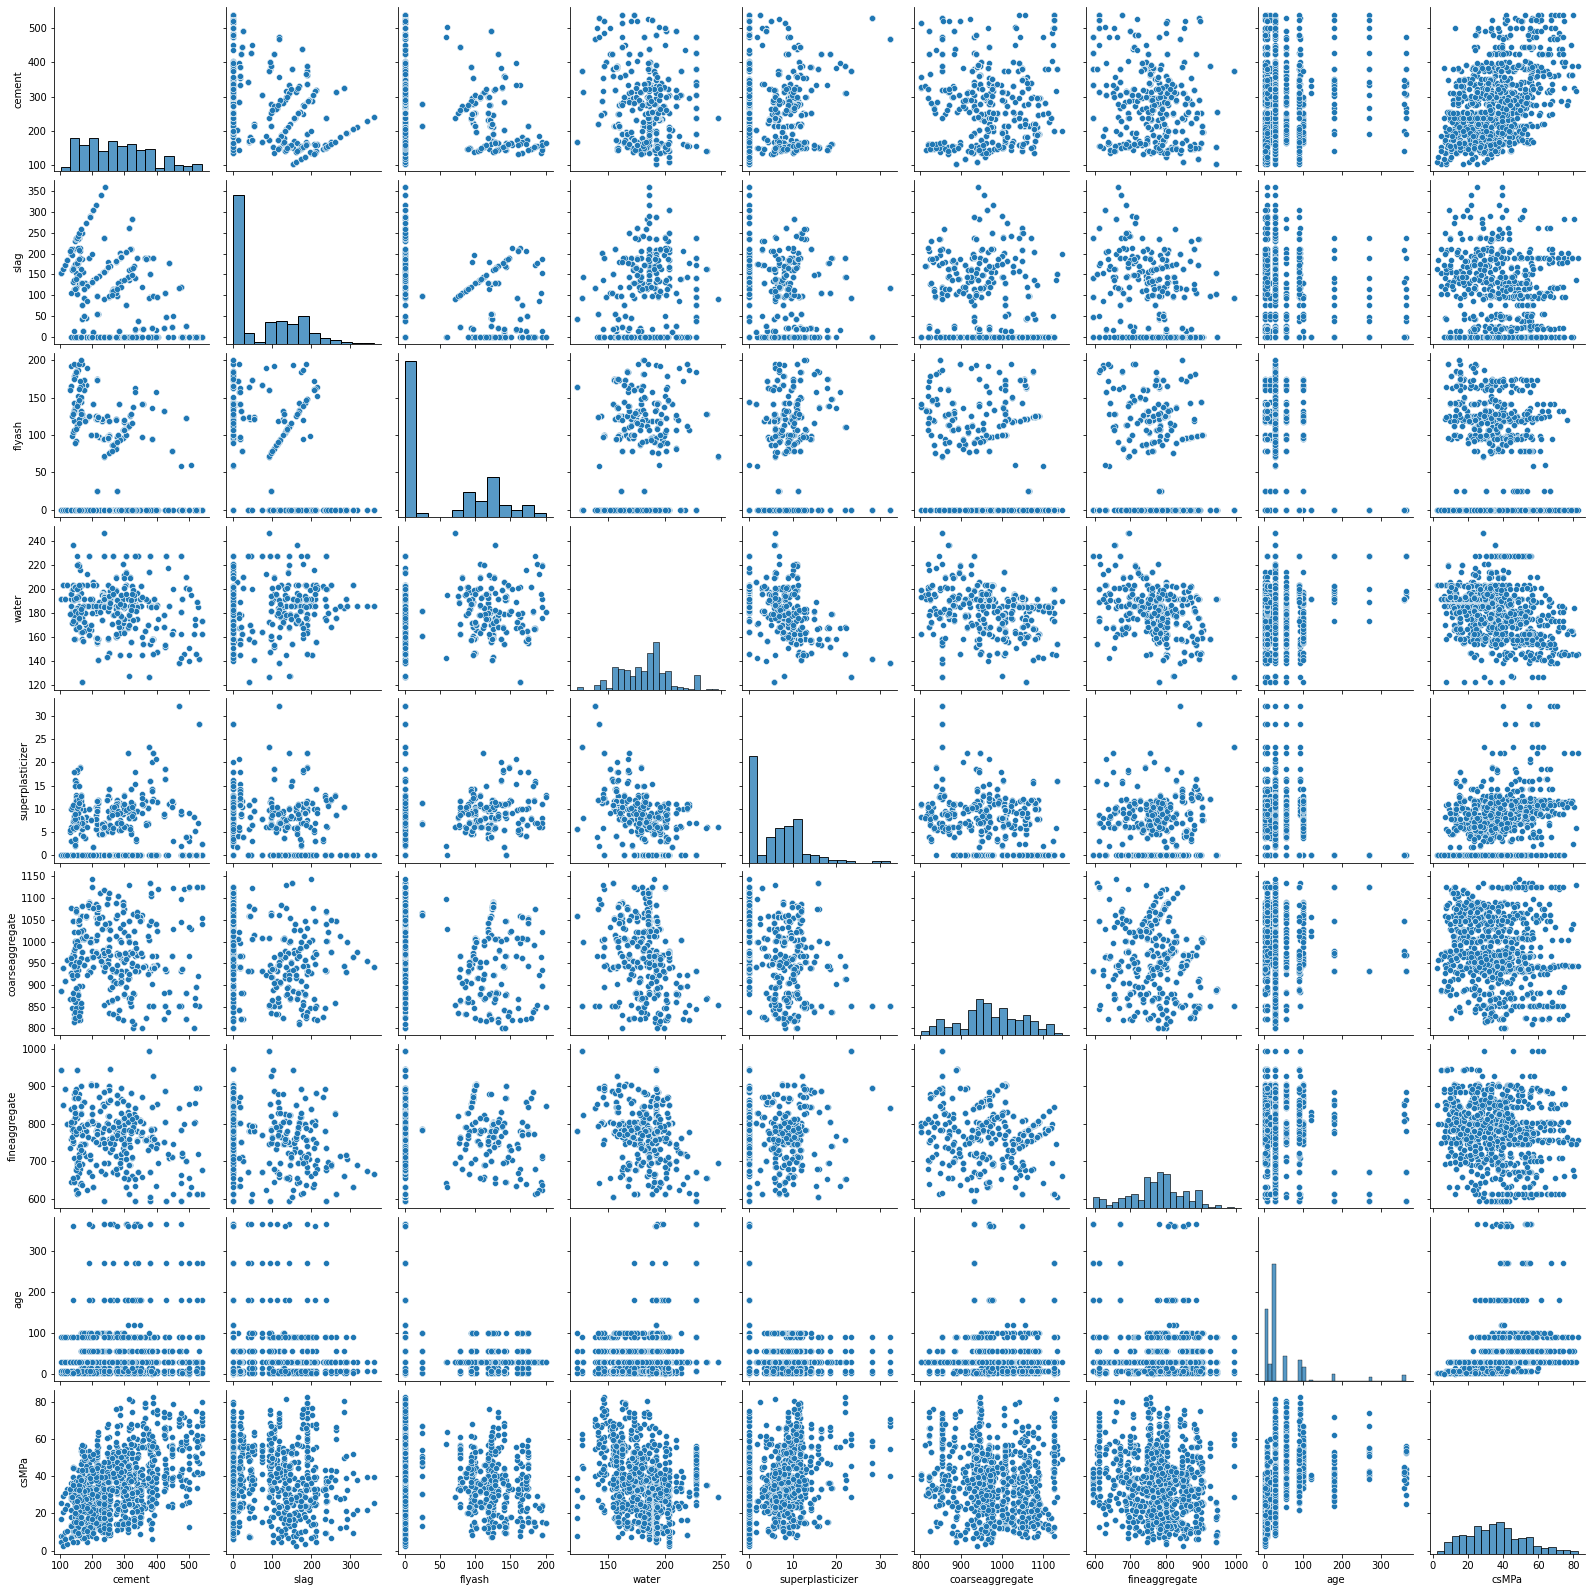

In [130]:
plt.figure(figsize=(3,2))
sns.pairplot(df)
plt.show()


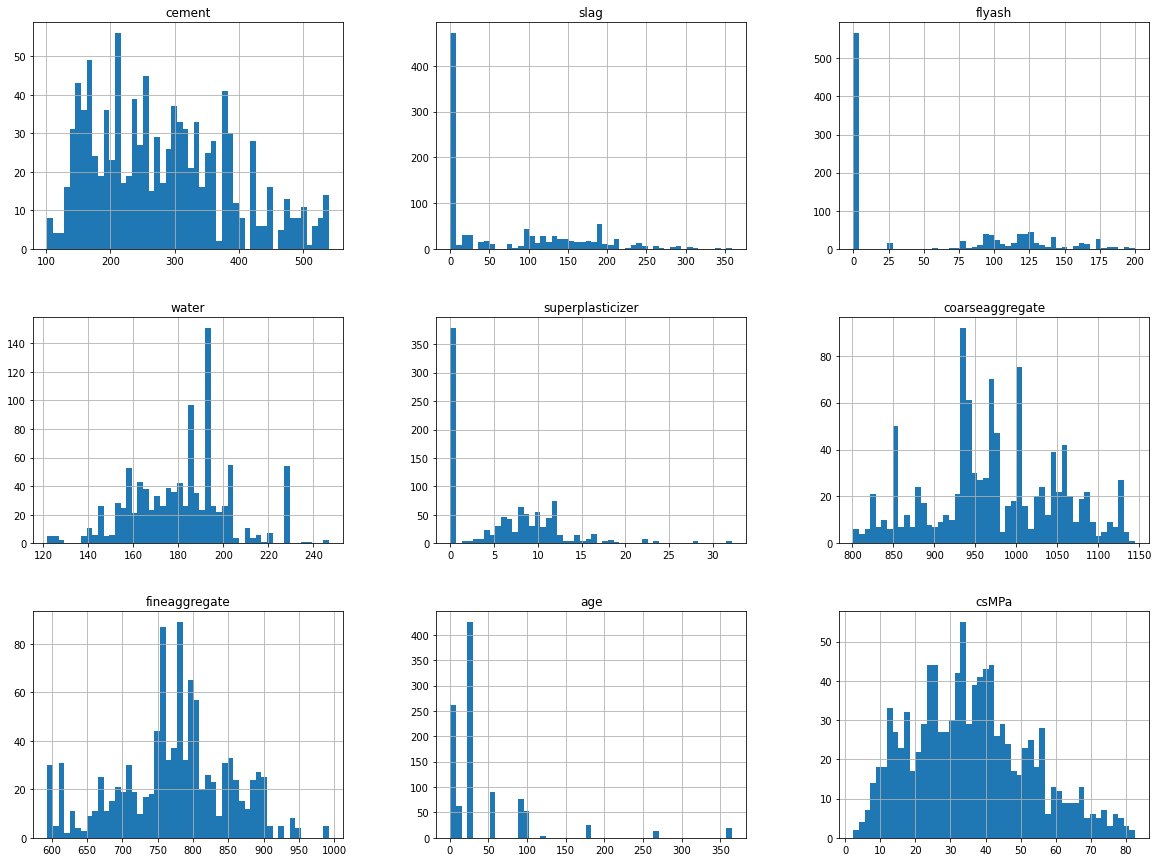

In [131]:
# Histogram
df.hist(bins=50, figsize=(20,15))
plt.show()

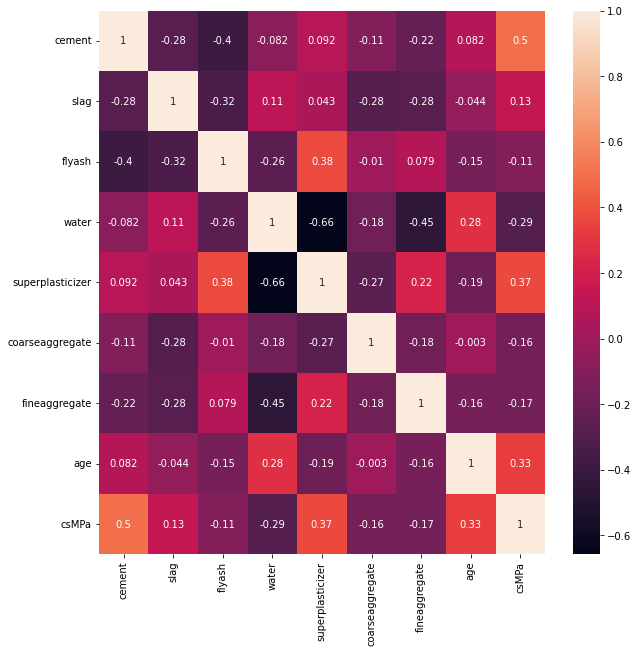

In [132]:
# Heatmap
corr_matrix = df.corr()
plt.figure(figsize = (10,10))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

<AxesSubplot:xlabel='age', ylabel='cement'>

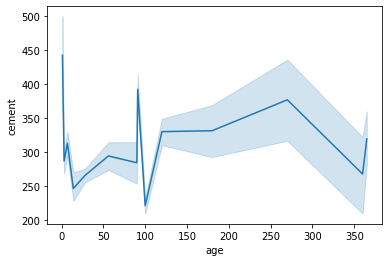

In [133]:
sns.lineplot(data=df,x='age', y='cement')

<AxesSubplot:xlabel='age', ylabel='cement'>

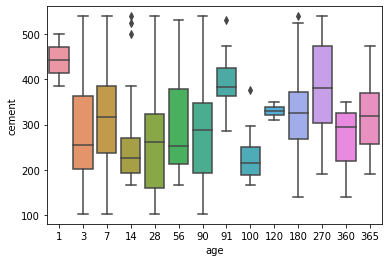

In [134]:
sns.boxplot(data=df,x='age', y='cement')

## Data Cleaning


### Remove unnecessary columns

In [135]:
df.columns


Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [136]:
df.drop(['flyash','water','coarseaggregate', 'fineaggregate'],axis=1,inplace=True)

In [137]:
df.corr()


,cement,slag,superplasticizer,age,csMPa
cement,1.000000,-0.275216,0.092386,0.081946,0.497832
slag,-0.275216,1.000000,0.043270,-0.044246,0.134829
superplasticizer,0.092386,0.043270,1.000000,-0.192700,0.366079
age,0.081946,-0.044246,-0.192700,1.000000,0.328873
csMPa,0.497832,0.134829,0.366079,0.328873,1.000000


In [138]:
df.describe()


,cement,slag,superplasticizer,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,6.204660,45.662136,35.817961
std,104.506364,86.279342,5.973841,63.169912,16.705742
min,102.000000,0.000000,0.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,7.000000,23.710000
50%,272.900000,22.000000,6.400000,28.000000,34.445000
75%,350.000000,142.950000,10.200000,56.000000,46.135000
max,540.000000,359.400000,32.200000,365.000000,82.600000


# Check for Missing Data

In [139]:
print(df.isnull().sum().sort_values(ascending=False))

cement              0
slag                0
superplasticizer    0
age                 0
csMPa               0
dtype: int64


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   superplasticizer  1030 non-null   float64
 3   age               1030 non-null   int64  
 4   csMPa             1030 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 40.4 KB


In [144]:
df.shape

(1030, 5)

## Over-Sampling Technique for Regression

In [145]:
import smogn
df_smogn = smogn.smoter(
    data=df,
    y='csMPa',
    k=9,
    samp_method = 'extreme',
    rel_thres = 0.80,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 1
)

r_index: 100%|##########| 74/74 [00:00<00:00, 627.86it/s]


In [146]:
df_smogn.shape

(1754, 5)

In [147]:
X_res = df_smogn.drop('csMPa',axis=1)
y_res = df_smogn['csMPa'].values

print(f' X_shape: {X_res.shape} \n y_shape: {y_res.shape}')

 X_shape: (1754, 4) 
 y_shape: (1754,)


In [148]:
X = df.drop('csMPa',axis=1)
y = df['csMPa'].values

print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (1030, 4) 
 y_shape: (1030,)


## Data Scaling


In [149]:
# Standarization
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)

In [150]:
# Standarization
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_res = scl.fit_transform(X_res)

In [151]:
X.shape

(1030, 4)

In [152]:
X_res.shape

(1754, 4)

## Split data into train and test

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=0)
print(f' X_train: {X_train.shape} & X_test: {X_test.shape}')
print(f' y_train: {y_train.shape} & y_test: {y_test.shape}')

 X_train: (824, 4) & X_test: (206, 4)
 y_train: (824,) & y_test: (206,)


In [154]:
from sklearn.model_selection import train_test_split
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res,y_res,test_size=0.20,shuffle=True,random_state=0)
print(f' X_train: {X_train_res.shape} & X_test: {X_test_res.shape}')
print(f' y_train: {y_train_res.shape} & y_test: {y_test_res.shape}')

 X_train: (1403, 4) & X_test: (351, 4)
 y_train: (1403,) & y_test: (351,)


## Model Selection


### RandomForest Regressor

In [155]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_test = rf_reg.predict(X_test)
y_pred_train = rf_reg.predict(X_train)

rf_reg.fit(X_train_res, y_train_res)
y_pred_test_res = rf_reg.predict(X_test_res)
y_pred_train_res = rf_reg.predict(X_train_res)

In [156]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('R Squared of Train befor Oversampling: {}'.format(r2_score(y_train,y_pred_train)*100))
print('R Squared of Test  befor Oversampling: {}'.format(r2_score(y_test,y_pred_test)*100))
print('********************************************************')
print('R Squared of Train after Oversampling: {}'.format(r2_score(y_train_res,y_pred_train_res)*100))
print('R Squared of Test after Oversampling: {}'.format(r2_score(y_test_res,y_pred_test_res)*100))

R Squared of Train befor Oversampling: 97.99996831196283
R Squared of Test  befor Oversampling: 90.65677991137144
********************************************************
R Squared of Train after Oversampling: 96.99113251124565
R Squared of Test after Oversampling: 92.92524746420563


### Use Grid Search CV

In [157]:
rf_reg.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [158]:
from sklearn.model_selection import GridSearchCV

parameters= {'n_estimators':[30,40,50,100],
             'criterion':['squared_error','absolute_error'],
             'max_depth':[3,4,5,6,7,8,9,11],
             'max_features':['sqrt','log2']
            }

grid_search = GridSearchCV(estimator = rf_reg,        
                           param_grid = parameters,          
                           cv = 5,
                           scoring='r2',                     
                           n_jobs = 1,
                           verbose=0)

In [159]:
rf_reg_res = RandomForestRegressor()

parameters= {'n_estimators':[30,40,50,100],
             'criterion':['squared_error','absolute_error'],
             'max_depth':[3,4,5,6,7,8,9,11],
             'max_features':['sqrt','log2']
            }

grid_search_res = GridSearchCV(estimator = rf_reg_res,        
                           param_grid = parameters,          
                           cv = 5,
                           scoring='r2',                     
                           n_jobs = 1,
                           verbose=0)

In [160]:
grid_search = grid_search.fit(X_train, y_train)
print("best r2 score befor Oversampleing:" , grid_search.best_score_ * 100)
grid_search.best_params_

best r2 score befor Oversampleing: 87.88894640044998


{'criterion': 'squared_error',
 'max_depth': 11,
 'max_features': 'log2',
 'n_estimators': 100}

In [161]:
grid_search_res = grid_search_res.fit(X_train_res, y_train_res)
print("best r2 score after Oversampleing:" , grid_search_res.best_score_ * 100)
grid_search_res.best_params_

best r2 score after Oversampleing: 92.09874193361607


{'criterion': 'squared_error',
 'max_depth': 11,
 'max_features': 'sqrt',
 'n_estimators': 50}

### Applying k-Fold Cross Validation


In [162]:
rf_reg = grid_search.best_estimator_
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, max_features='log2')

In [163]:
rf_reg_res = grid_search_res.best_estimator_
rf_reg_res.fit(X_train_res, y_train_res)

RandomForestRegressor(max_depth=11, max_features='sqrt', n_estimators=50)

In [164]:
from sklearn.model_selection import cross_val_score
rf_reg_results = cross_val_score(estimator = rf_reg, X = X_train, y = y_train, cv = 5)
rf_reg_results_res = cross_val_score(estimator = rf_reg_res, X = X_train_res, y = y_train_res, cv = 5)

rf_reg_pred = rf_reg.predict(X_test)
rf_reg_res_pred = rf_reg_res.predict(X_test_res)


print("Validation score befor Oversampling: %.5f%% (%.5f%%)" % (rf_reg_results.mean()*100.0, rf_reg_results.std()*100.0))
print("Validation score after Oversampling: %.5f%% (%.5f%%)" % (rf_reg_results_res.mean()*100.0, rf_reg_results_res.std()*100.0))
print('********************************************************')

print('R Squared of Test  befor Oversampling: {}'.format(r2_score(y_test,rf_reg_pred)*100))
print('R Squared of Test after Oversampling: {}'.format(r2_score(y_test_res,rf_reg_res_pred)*100))

Validation score befor Oversampling: 87.85215% (2.58227%)
Validation score after Oversampling: 91.95269% (1.53815%)
********************************************************
R Squared of Test  befor Oversampling: 89.81201696324051
R Squared of Test after Oversampling: 92.30769480240161


### Results Visualization

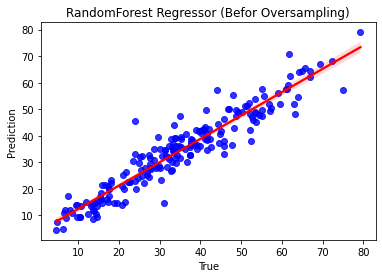

In [165]:
plt.Figure(figsize=(8,10))
ax = sns.regplot(x=y_test, y=rf_reg_pred,
                 scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('RandomForest Regressor (Befor Oversampling)')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

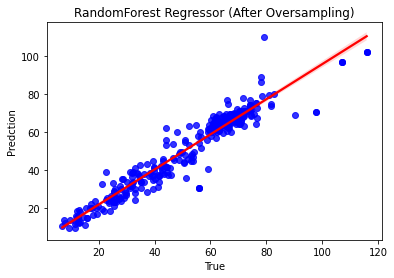

In [166]:
plt.Figure(figsize=(8,10))
ax = sns.regplot(x=y_test_res, y=rf_reg_res_pred,
                 scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('RandomForest Regressor (After Oversampling)')
plt.xlabel('True')
plt.ylabel('Predction')
plt.show()

### XGB Regressor


In [167]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor()

xgb_reg_res = xgb.XGBRegressor()

In [168]:
xgb_reg.fit(X_train, y_train)
y_pred_test = xgb_reg.predict(X_test)
y_pred_train = xgb_reg.predict(X_train)

xgb_reg.fit(X_train_res, y_train_res)
y_pred_test_res = xgb_reg.predict(X_test_res)
y_pred_train_res = xgb_reg.predict(X_train_res)

In [169]:
print('R Squared of Train befor Oversampling: {}'.format(r2_score(y_train,y_pred_train)*100))
print('R Squared of Test  befor Oversampling: {}'.format(r2_score(y_test,y_pred_test)*100))
print('********************************************************')
print('R Squared of Train after Oversampling: {}'.format(r2_score(y_train_res,y_pred_train_res)*100))
print('R Squared of Test after Oversampling: {}'.format(r2_score(y_test_res,y_pred_test_res)*100))

R Squared of Train befor Oversampling: 99.07509055801037
R Squared of Test  befor Oversampling: 91.0746599492475
********************************************************
R Squared of Train after Oversampling: 97.35976626879356
R Squared of Test after Oversampling: 92.69516873671473


In [170]:
xgb_reg.get_params().keys()


dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [171]:
from sklearn.model_selection import RandomizedSearchCV

parameters= {'booster':['gbtree','gblinear'],
             'base_score' : [0.5],
             'objective':['reg:squarederror'],
             'validate_parameters':[True],
             'max_depth':[6,7,8,9,11,13,15],
             'learning_rate':[0.01,0.03,0.1,0.3],
             'n_estimators':[100,200,300],
             'reg_alpha':[0,1,2,3],
             'reg_lambda':[0,1,2,3],
             'random_state': [42]
            }

rand = RandomizedSearchCV(estimator = xgb_reg,       
                           param_distributions = parameters,          
                           cv = 5,
                           scoring='r2',                     
                           n_jobs = 1,
                           verbose=0)      


rand_res = RandomizedSearchCV(estimator = xgb_reg_res,        
                           param_distributions = parameters,          
                           cv = 5,
                           scoring='r2',                     
                           n_jobs = 1,
                           verbose=0)

In [172]:
rand = rand.fit(X_train, y_train)
print("best r2 score befor Oversampleing:" , rand.best_score_ * 100)
rand.best_params_

[15:36:36] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:36:36] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_meth

{'validate_parameters': True,
 'reg_lambda': 2,
 'reg_alpha': 0,
 'random_state': 42,
 'objective': 'reg:squarederror',
 'n_estimators': 100,
 'max_depth': 15,
 'learning_rate': 0.1,
 'booster': 'gbtree',
 'base_score': 0.5}

In [173]:
rand_res = rand_res.fit(X_train_res, y_train_res)
print("best r2 score after Oversampleing:" , rand_res.best_score_ * 100)
rand_res.best_params_

[15:37:17] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:37:18] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:37:19] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but g

{'validate_parameters': True,
 'reg_lambda': 2,
 'reg_alpha': 3,
 'random_state': 42,
 'objective': 'reg:squarederror',
 'n_estimators': 300,
 'max_depth': 7,
 'learning_rate': 0.1,
 'booster': 'gbtree',
 'base_score': 0.5}

In [174]:
xgb_reg = rand.best_estimator_
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=2, ...)

In [175]:
xgb_reg_res = rand_res.best_estimator_
xgb_reg_res.fit(X_train_res, y_train_res)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=3, reg_lambda=2, ...)

In [176]:
xgb_reg_results = cross_val_score(estimator = xgb_reg, X = X_train, y = y_train, cv = 5)
xgb_reg_pred = xgb_reg.predict(X_test)

In [177]:
xgb_reg_results_res = cross_val_score(estimator = xgb_reg_res, X = X_train_res, y = y_train_res, cv = 5)
xgb_reg_res_pred = xgb_reg_res.predict(X_test_res)

In [178]:
print("Validation score befor Oversampling: %.5f%% (%.5f%%)" % (xgb_reg_results.mean()*100.0, xgb_reg_results.std()*100.0))
print("Validation score after Oversampling: %.5f%% (%.5f%%)" % (xgb_reg_results_res.mean()*100.0, xgb_reg_results_res.std()*100.0))
print('********************************************************')
print('R Squared of Test  befor Oversampling: {}'.format(r2_score(y_test,xgb_reg_pred)*100))
print('R Squared of Test after Oversampling: {}'.format(r2_score(y_test_res,xgb_reg_res_pred)*100))

Validation score befor Oversampling: 90.56550% (2.20749%)
Validation score after Oversampling: 92.12056% (1.58006%)
********************************************************
R Squared of Test  befor Oversampling: 91.13353025916994
R Squared of Test after Oversampling: 93.57409336523507


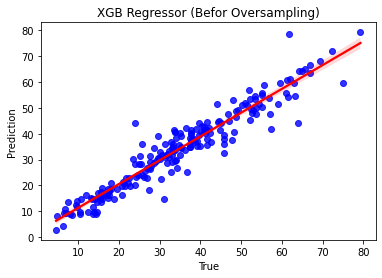

In [179]:
plt.Figure(figsize=(8,10))
ax = sns.regplot(x=y_test, y=xgb_reg_pred,
                 scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('XGB Regressor (Befor Oversampling)')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()


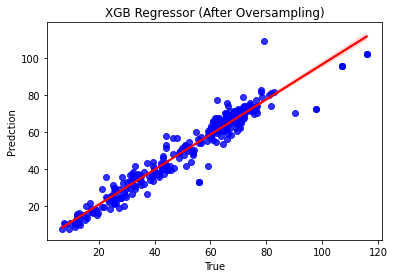

In [180]:
plt.Figure(figsize=(8,10))
ax = sns.regplot(x=y_test_res, y=xgb_reg_res_pred,
                 scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('XGB Regressor (After Oversampling)')
plt.xlabel('True')
plt.ylabel('Predction')
plt.show()

### Voting Regressor

In [181]:
from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor([('rf',rf_reg),('xgb',xgb_reg)],verbose=True)
voting_reg.fit(X_train,y_train)
voting_reg_results = cross_val_score(estimator = voting_reg, X = X_train, y = y_train, cv = 5)
voting_reg_pred = voting_reg.predict(X_test)

[Voting] ....................... (1 of 2) Processing rf, total=   0.2s
[Voting] ...................... (2 of 2) Processing xgb, total=   1.7s
[Voting] ....................... (1 of 2) Processing rf, total=   0.2s
[Voting] ...................... (2 of 2) Processing xgb, total=   0.7s
[Voting] ....................... (1 of 2) Processing rf, total=   0.2s
[Voting] ...................... (2 of 2) Processing xgb, total=   0.7s
[Voting] ....................... (1 of 2) Processing rf, total=   0.2s
[Voting] ...................... (2 of 2) Processing xgb, total=   0.7s
[Voting] ....................... (1 of 2) Processing rf, total=   0.2s
[Voting] ...................... (2 of 2) Processing xgb, total=   0.7s
[Voting] ....................... (1 of 2) Processing rf, total=   0.2s
[Voting] ...................... (2 of 2) Processing xgb, total=   0.7s


In [182]:
print("Validation score befor Oversampling: %.5f%% (%.5f%%)" % (voting_reg_results.mean()*100.0, voting_reg_results.std()*100.0))
print('R Squared of Test befor Oversampling: {}'.format(r2_score(y_test,voting_reg_pred)*100))

Validation score befor Oversampling: 89.82955% (2.39694%)
R Squared of Test befor Oversampling: 91.2207372219289


In [183]:
voting_reg_res = VotingRegressor([('xgb',xgb_reg),('rf',rf_reg)])
voting_reg_res.fit(X_train_res,y_train_res)
voting_reg_results_res = cross_val_score(estimator = voting_reg_res, X = X_train_res, y = y_train_res, cv = 5)
voting_reg_pred_res = voting_reg_res.predict(X_test_res)

In [184]:
print("Validation score befor Oversampling: %.5f%% (%.5f%%)" % (voting_reg_results_res.mean()*100.0, voting_reg_results_res.std()*100.0))
print('R Squared of Test after Oversampling: {}'.format(r2_score(y_test_res,voting_reg_pred_res)*100))

Validation score befor Oversampling: 92.38076% (1.57000%)
R Squared of Test after Oversampling: 93.00689138307165


In [185]:
rf = r2_score(y_test_res,rf_reg_res_pred)*100
xgb = r2_score(y_test_res,xgb_reg_res_pred)*100
voting = r2_score(y_test_res,voting_reg_pred_res)*100
scores = [rf,xgb,voting]
labels = ['Random Forest Regressor', 'XGB Regressor','Voting Regressor']
accs = {'R2 Score': scores}
df = pd.DataFrame(accs,index=labels)
df

,R2 Score
Random Forest Regressor,92.307695
XGB Regressor,93.574093
Voting Regressor,93.006891
